# Importação de dados e primeiras análises
Importar e ler texto

In [1]:
'''
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer #Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from boruta import BorutaPy

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
'''

'\nimport matplotlib.pyplot as plt \nimport seaborn as sns\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import OrdinalEncoder\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OneHotEncoder\n\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.feature_extraction.text import TfidfVectorizer #Naive Bayes\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.inspection import permutation_importance\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.linear_model import SGDRegressor \nfrom sklearn.linear_model import Perceptron\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.svm import SVC\n\nfrom boruta import BorutaPy\n\nfrom sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifie

In [4]:
import pandas as pd
import numpy as np

Definir diretório de trabalho

In [5]:
%cd C:\Users\fabio\Documents\Ciência de dados\07. Jupyter notebook
#é sem aspas nem nada

C:\Users\fabio\Documents\Ciência de dados\07. Jupyter notebook


Ler csv

In [6]:
df = pd.read_csv('titanic.csv',sep=',',na_values='-')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
a = 1

In [ ]:
df = pd.read_csv('titanic.csv',sep=',',na_values='-')
diabetes = pd.read_csv('diabetes.csv',sep=',',na_values='-')
mensagens = pd.read_csv('mensagens.csv',sep=',',na_values='-')
emails = pd.read_csv('emails.csv',sep=',',na_values='-')
adults = pd.read_csv('adult.csv',sep=',',na_values='-')
fraud = pd.read_csv('fraudTrain.csv')
car = pd.read_csv('CarPrice_Assignment.csv')
covid = pd.read_csv('covid.txt')
#df = pd.read_csv('mensagens.csv',sep=',',na_values='-')

Lista as colunas

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


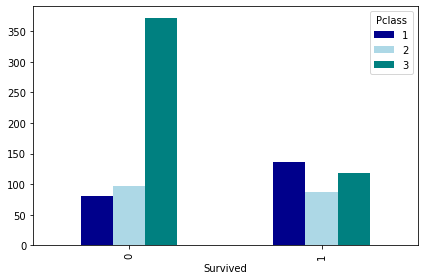

In [5]:
print(pd.crosstab(df.Survived,df.Pclass))
import matplotlib.pyplot as plt

pd.crosstab(df.Survived,df.Pclass).plot.bar(color=('DarkBlue', 'LightBlue', 'Teal'))
plt.tight_layout()

In [6]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Olhada geral

In [7]:
# Quantidade de linhas e colunas
print('\n\nShape',df.shape)

# Head
print('\n\n',df.head)

# Olhada geral
print('\n\n',df.describe)



Shape (891, 12)


 <bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                

Análise geral

In [8]:
# Verificar se tem nulos
print('Tem nulos?\n',df.isna().any())

# Filtrar as linhas em que uma coluna tem nulos
# Aqui filtrando um campo só 
print('Linhas em que um campo é nulo\n',df.Embarked[df.isnull().Age])

# Classes são balanceadas? Contagem de valores / valores únicos
print('\n\nValores únicos',df.Embarked.unique())
print('\nClasses são balanceadas?\n',df.Survived.value_counts())
print('\nProporção de classes\n',df.Survived.value_counts(normalize=True))

Tem nulos?
 PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
Linhas em que um campo é nulo
 5      Q
17     S
19     C
26     C
28     Q
      ..
859    C
863    S
868    S
878    S
888    S
Name: Embarked, Length: 177, dtype: object


Valores únicos ['S' 'C' 'Q' nan]

Classes são balanceadas?
 0    549
1    342
Name: Survived, dtype: int64

Proporção de classes
 0    0.616162
1    0.383838
Name: Survived, dtype: float64


Encontrar valores nulos num gráfico

<AxesSubplot:>

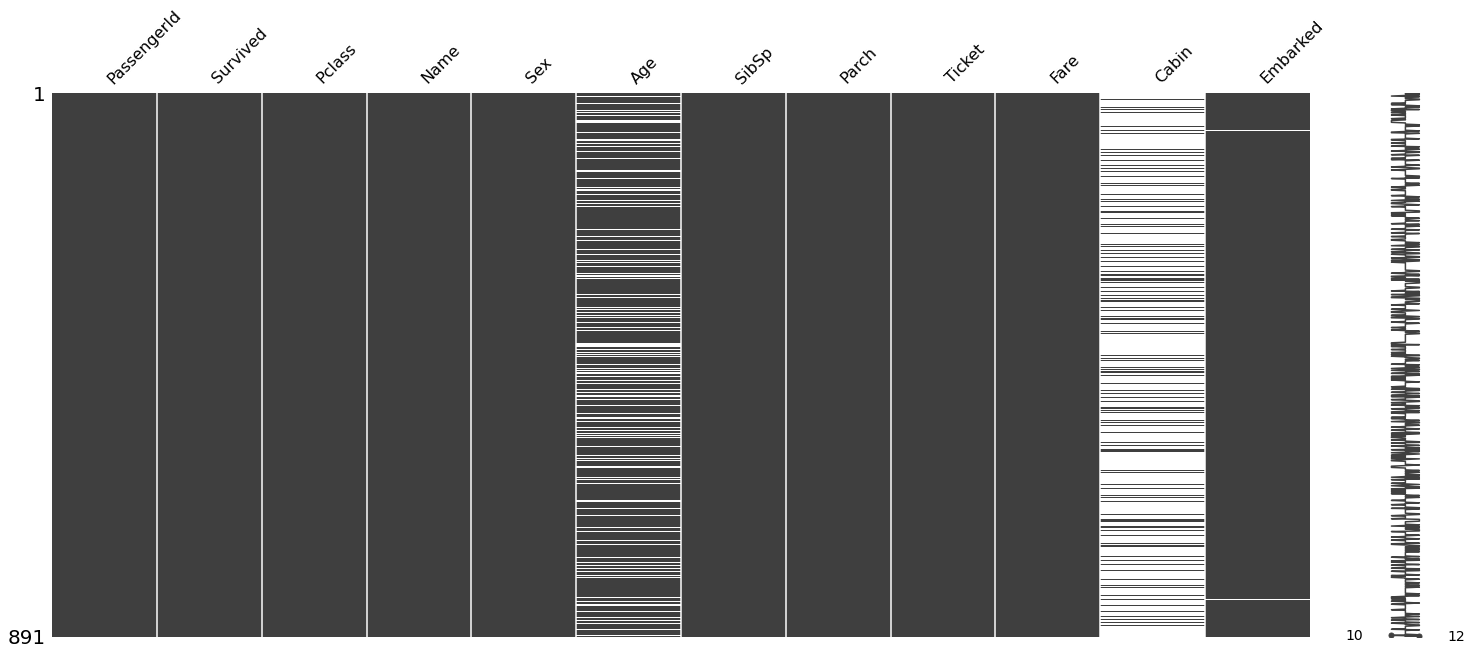

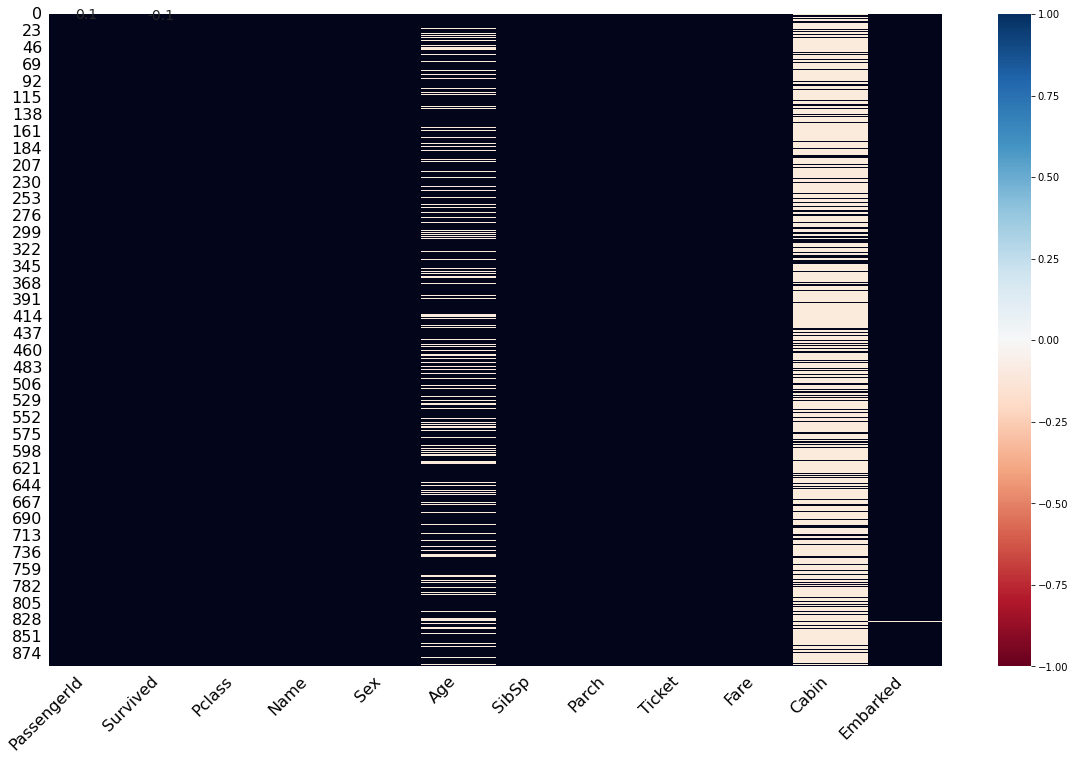

In [9]:
import missingno as msnum
import seaborn as sns
# instalar pelo prompt: conda install -c conda-forge/label/gcc7 missingno
msnum.matrix(df)
msnum.heatmap(df)

#usando heatmap para achar os nulos
sns.heatmap(df.isnull(), cbar=False)

Encontrar valores

In [10]:
df.loc[0:3,['Survived','Sex']] #localização por rótulo
df.iloc[0:3,[1,3]] #localização por índice

,Survived,Name
0,0,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,"Heikkinen, Miss. Laina"


In [11]:
print('O índice da linha que contém a máxima idade é' , df['Age'].idxmax()) # Retorna o índice do máximo de Glucose
print('O valor de maior idade é', df['Age'].loc[df['Age'].idxmax()],'\n' )
print('O índice da linha que contém a mínima glicose é' , df['Age'].idxmin()) # Retorna o índice do máximo de Glucose
print('O valor de menor glicose é', df['Age'].loc[df['Age'].idxmin()],'\n' )

O índice da linha que contém a máxima idade é 630
O valor de maior idade é 80.0 

O índice da linha que contém a mínima glicose é 803
O valor de menor glicose é 0.42 



Linhas duplicadas

In [12]:
df.duplicated(keep=False).sum()

0

Fazer um groupby (group by)

In [13]:
df.groupby(['Age'])['Survived'].mean() # Média de "sobreviveu" por idade

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

Quantos valores únicos/distintos?

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
len(df.groupby(['Name']).size())

891

## Fazer gráficos

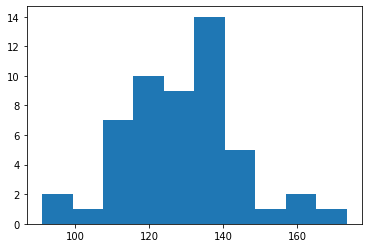

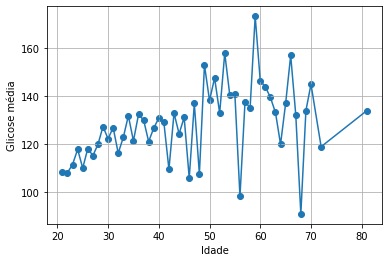

In [16]:
idades = np.sort(diabetes['Age'].unique()) #gera uma lista, o sort coloca em ordem
diabetes_idade = diabetes.groupby(['Age'])['Glucose'].mean() # Glicose média por idade

import matplotlib.pyplot as plt 
plt.hist(diabetes_idade) #histograma
plt.show()

plt.plot(idades,diabetes_idade) #coloca a linha no gráfico
plt.scatter(idades,diabetes_idade) #coloca os pontos no gráfico
            # para gerar os pontos com linhas precisa rodar isso inteiro
plt.grid() #linhas de grade
plt.ylabel('Glicose média')
plt.xlabel('Idade')
plt.show()

### Correlograma

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

'''
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(car,kind = 'reg')
g.map_lower(corrfunc)
plt.show()

'''

'\ndef corrfunc(x, y, ax=None, **kws):\n    """Plot the correlation coefficient in the top left hand corner of a plot."""\n    r, _ = pearsonr(x, y)\n    ax = ax or plt.gca()\n    ax.annotate(f\'ρ = {r:.2f}\', xy=(.1, .9), xycoords=ax.transAxes)\n\ng = sns.pairplot(car,kind = \'reg\')\ng.map_lower(corrfunc)\nplt.show()\n\n'

# Imputação

Preenchimento simples (imputação)

In [18]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[4], [np.nan], [6]])
X = [[4], [np.nan], [100]]
print(imp_mean.transform(X)) #ele inputa na coluna a média dos outros 
X = imp_mean.transform(X) #se quiser alterar a variável
#pode ser usado o fit_transform para fazer as duas etapas de uma vez

[[  4.]
 [  5.]
 [100.]]


Preencher os nulos com alguma coisa

In [19]:
diabetes["Glucose"].replace(0, np.NaN)
#substitui os zeros por NaN

diabetes_idade = diabetes.groupby(['Age'])['Glucose'].mean()
#mas aqui, a idade é um índice (isso é uma série)

diabetes_idade2 = pd.DataFrame(diabetes_idade.index)
diabetes_idade2['Glicose_media'] = diabetes_idade.values
#aqui virou um dataframe, e o índice virou uma coluna

diabetes4 = pd.merge(diabetes, diabetes_idade2, on=["Age"], how='left')
#aqui faz o join

diabetes4['Glucose'].fillna(diabetes4['Glicose_media'])
#aqui preenche

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

Contagem de palavras

In [20]:
pd.DataFrame(pd.melt(mensagens[mensagens['Label']=='NÃO SPAM']).groupby(['value']).count())

,variable
value,
NÃO SPAM,7
anexo,3
as,2
da,1
de,1
dinheiro,1
do,1
em,3
enviando,1


# Preparação e tratamento

### Cálculo de idade

In [21]:
from datetime import date, datetime

def age(x):
    today = date.today()
    age = today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    return age

## Separação em treino e teste estratificado

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.iloc[:, 0:8], #dá pra fazer isso com o drop, axis=1
                                                    diabetes.iloc[:, 8],
                                                    test_size = 0.4, 
                                                    random_state = 0, 
                                                    stratify = diabetes['Outcome'])

# outra opção
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

## Normalização (escalonamento)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) #faz o fit
X_train_2 = scaler.transform(X_train) #faz a transformação, transforma num array do numpy
print(scaler.data_max_)

#transforma em dataframe
X_train_2 = pd.DataFrame(X_train_2,columns=X_train.columns)

[ 17.   199.   122.    63.   846.    67.1    2.42  81.  ]


## Codificação

### OrdinalEncoder e LabelEncoder

In [24]:
X = covid[['sexo','sedentario']]
y = covid['covid grave']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=(['masculino', 'feminino'],['nao', 'sim']))
# as categorias acima são opcionais
X_enc = enc.fit_transform(X)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)

### Get_dummies

In [25]:
pd.get_dummies(X,drop_first=True)


,sexo_masculino,sedentario_sim
0,1,1
1,0,0
2,0,0
3,0,1
4,1,0
5,0,0
6,0,1
7,1,1
8,1,1
9,1,1


### OneHotEncoder

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(covid)
print('Array transformado (só o começo)\n',ohe.transform(covid).toarray()[0:5])
print('\n\nFeatures de entrada\n',ohe.feature_names_in_)
print('\n\ngFeatures de saída',ohe.get_feature_names_out(['peso', 'sexo', 'sedentario', 'covid grave']))

Array transformado (só o começo)
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]]


Features de entrada
 ['peso' 'sexo' 'sedentario' 'covid grave']


gFeatures de saída ['peso_12' 'peso_14' 'peso_18' 'peso_25' 'peso_28' 'peso_30' 'peso_33'
 'peso_37' 'peso_45' 'peso_73' 'peso_86' 'sexo_feminino' 'sexo_masculino'
 'sedentario_nao' 'sedentario_sim' 'covid grave_nao' 'covid grave_sim']


Transformação em datas

In [27]:
print('primeira:',min(pd.to_datetime(fraud.trans_date_trans_time)))

primeira: 2019-01-01 00:00:18


### Exemplo de Tratamento do Titanic

In [28]:
enc = OrdinalEncoder()
scaler = MinMaxScaler()

#titanic = pd.read_csv('titanic.csv',usecols = ['Fare','Parch','SibSp','Age','Sex','Survived'])
#titanic[['Sex']] = enc.fit_transform(titanic[['Sex']])
#titanic[['Age','Fare']] = scaler.fit_transform(titanic[['Age','Fare']])
#titanic.Age = titanic.Age.fillna(titanic.Age.mean())

## Exemplo de tratamento

### 1. Fazer uma cópia e dropar colunas inúteis

In [29]:
# _ex é por causa desse exemplo

# Dropar colunas inúteis
dfc = df.copy()
dfc = dfc.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

### 2. Label Encoder

In [30]:
# Label encoder para Sex
#foi atribuído direto no dataframe original, então não precisa mais mexer
le_ex = LabelEncoder()
dfc['Sex'] = le_ex.fit_transform(dfc.Sex)

### 3. OneHot Encoding

In [31]:
# one hot encoding para classe
ohe_ex = OneHotEncoder(handle_unknown='ignore', drop='first')

#fit
ohe_ex.fit(pd.DataFrame(dfc.Pclass))

#transform
Pclass_trans = ohe_ex.transform(pd.DataFrame(dfc.Pclass)).toarray()
print('Feature names in:',ohe_ex.feature_names_in_)
print('Colocar na próxima célula o que saiu daqui')

Feature names in: ['Pclass']
Colocar na próxima célula o que saiu daqui


In [32]:
Pclass_columns = ohe_ex.get_feature_names_out(['Pclass']) #colocar aqui o que saiu da outra
Pclass = pd.DataFrame(Pclass_trans, columns=Pclass_columns) #criou outro dataframe

#### 3.1 Imputação para a linha Embarked (que tem nan)

In [33]:
imp_Embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_Embarked.fit(pd.DataFrame(df.Embarked))
dfc.Embarked = imp_Embarked.transform(pd.DataFrame(df.Embarked))

#X = [[4], [np.nan], [100]]
#print(imp_mean.transform(X)) #ele inputa na coluna a média dos outros 
#X = imp_mean.transform(X) #se quiser alterar a variável
#pode ser usado o fit_transform para fazer as duas etapas de uma vez

In [34]:
#************************************************
# de novo para Embarked 
ohe_ex_Emb = OneHotEncoder(handle_unknown='ignore', drop='first')

#fit
ohe_ex_Emb.fit(pd.DataFrame(dfc.Embarked))

#transform
Embarked_trans = ohe_ex_Emb.transform(pd.DataFrame(dfc.Embarked)).toarray()
print('Feature names in:',ohe_ex_Emb.feature_names_in_)
print('Colocar na próxima célula o que saiu daqui')


Feature names in: ['Embarked']
Colocar na próxima célula o que saiu daqui


In [35]:
Embarked_columns = ohe_ex_Emb.get_feature_names_out(['Embarked']) #colocar aqui o que saiu da outra
Embarked_ohe = pd.DataFrame(Embarked_trans, columns=Embarked_columns) #criou outro dataframe

### 4. Função map

In [36]:
# função map para Embarked - usar isso se for árvore
cod = {'S':0,'C':1,'Q':2}
Embarked = pd.DataFrame(df.Embarked.map(cod), columns=['Embarked'])
dfc['Embarked'] = df.Embarked.map(cod)

### 5. MinMaxScaler

In [37]:
#MinMaxScaler
scaler_ex = MinMaxScaler()
scaler_ex.fit(dfc) #faz o fit
dfc_scale = scaler_ex.transform(dfc) #faz a transformação, transforma num array do numpy
print(scaler_ex.data_max_)

[  1.       3.       1.      80.       8.       6.     512.3292   2.    ]


In [38]:
#transforma em dataframe
dfc_scale = pd.DataFrame(dfc_scale,columns=dfc.columns)

### 6. Juntando tudo

**Se for árvore de decisão está pronto**

usar a base dfc<br>
Sex e embarket foi transformado no lugar<br>

**Se for algoritmo de distância**

Usar a base escalonada dfc_scale<br>
Precisa tirar da base: 
* Pclass e juntar o novo dataframe Pclass<br>
* Embarked: Juntar o dataframe Embarked<br>


In [39]:
#tira as colunas originais
dfc_scale_copia = dfc_scale.drop(['Pclass','Embarked'],axis=1).copy()

In [40]:
#coloca as colunas com one hot encoding
dfc_scale_copia = dfc_scale_copia.join(Pclass)
dfc_scale_copia = dfc_scale_copia.join(Embarked_ohe)

#### Separando em treino e teste

In [41]:
from sklearn.model_selection import train_test_split
dfcX_train, dfcX_test, dfcy_train, dfcy_test = train_test_split(dfc_scale_copia.iloc[:, 1:8], 
                                                    dfc_scale_copia.iloc[:, 0],
                                                    test_size = 0.3, 
                                                    random_state = 0, 
                                                    stratify = dfc_scale_copia['Survived'])

In [42]:
dfcy_train = pd.DataFrame(dfcy_train)

In [43]:
#inputando dados na idade do titanic
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfcX_train = pd.DataFrame(imp_mean.fit_transform(dfcX_train),columns=dfcX_train.columns)
dfcX_test = pd.DataFrame(imp_mean.transform(dfcX_test),columns=dfcX_test.columns)

## Matriz de correlação

<AxesSubplot:>

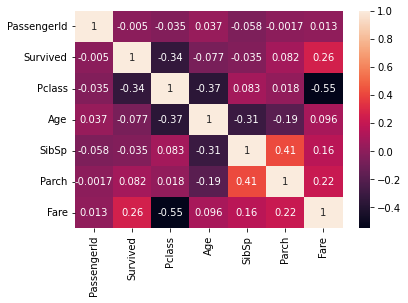

In [44]:
matrix_corr = pd.DataFrame(df.corr())

import seaborn as sns
sns.heatmap(matrix_corr, annot=True)

### Boruta

In [45]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import numpy as np
rfc = RandomForestClassifier(max_depth = 6,random_state =12, class_weight='balanced')
brpy = BorutaPy(rfc,n_estimators = 'auto', max_iter = 10, random_state = 12)
#na primeira vez que fiz, converti em um array do numpy
#aqui precisa colocar o ".values"

brpy.fit(X_train.values,y_train.values)
print("Ranking: ",X_train.columns[brpy.support_])          
print("No. of significant features: ", brpy.n_features_) 

Ranking:  Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
No. of significant features:  4


### Função Map

# Modelos

## 1. KNN

<font color=red>**O escalonamento está no item anterior**</font>

Outros parâmetros
* **weights = {‘uniform’, ‘distance’} or callable, default=’uniform’**
* algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
* p: int, default=2, Power parameter for the Minkowski metric.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_2,y_train)
y_train_pred = neigh.predict(X_train_2) #tem o predict proba

### 1.1 Encontrando o valor de K (para regressão)

In [47]:
# Fazendo o scaling do teste
scaler.fit(X_train)
X_test_2 = pd.DataFrame(scaler.transform(X_test))
X_test_2.columns = X_test.columns

Minimum error:- 0.2532467532467532 at K = 16


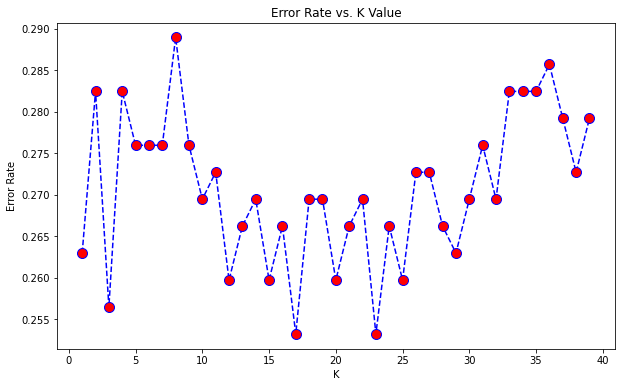

In [48]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_2,y_train)
 pred_i = knn.predict(X_test_2)
 error_rate.append(np.mean(pred_i != y_test))
 # A taxa de erro é a quantidade de vezes em que a predição acertou sobre o total, só isso. 
 # Esse "mean" simplesmente divide a quantidade de Trues pelo total
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# 2. Naive Bayes

Vectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
vectorizer = TfidfVectorizer(
    input='content',     # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    #stop_words=my_stop_words # remove stop words
)
emails_transformed = vectorizer.fit_transform(emails.email)

Fit

In [50]:
from sklearn.naive_bayes import MultinomialNB # Multinomial é mais usado para texto
#poderia ser o GaussianNB para distribuição contínua
#BernoulliNB(binarize = None) para binárias

# train a classifier
classifier = MultinomialNB()
classifier.fit(emails_transformed,emails.spam)

MultinomialNB()

In [51]:
text = ['receba dinheiro fotos']
text2 = vectorizer.transform(text)
print(text,'é classificado como',classifier.predict(text2),'\n')

text = ['receba','dinheiro','fotos']
text2 = vectorizer.transform(text)
print(text,'é classificado como',classifier.predict(text2),'\n')
      
text = ['lafranhudo']
text2 = vectorizer.transform(text)
print(text,'é classificado como',classifier.predict(text2),'\n')

['receba dinheiro fotos'] é classificado como [ True] 

['receba', 'dinheiro', 'fotos'] é classificado como [ True  True False] 

['lafranhudo'] é classificado como [ True] 



## 3. Árvores de decisão
### (A codificação está nos itens acima e precisa fazer)

In [52]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
rfclf = RandomForestClassifier(random_state=0)
rfclf.fit(X_train,y_train)
print('Score',round(rfclf.score(X_test,y_test),2))

Score 0.78


### Permutation importance

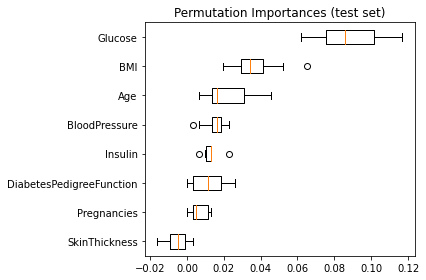

In [53]:
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
result = permutation_importance(rfclf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]) 
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### Gerando a árvore

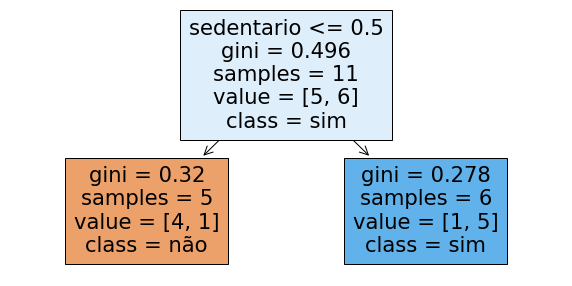

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth = 1)
clf.fit(X_enc,y_le)
clf.decision_path

from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(clf, 
                   feature_names=['sexo','sedentario'],  
                   class_names=['não','sim'],
                   filled=True)

Leitura

* Value = [5,6] são 5 valores 0 (feminino) e 6 valor 1 (masculino)
* são 5 não sedentários, que estão na folha da esquerda
* value = [4,1] são 4 valores 0 (feminino) e 1 valor 1 (masculino)

In [55]:
print('Acurácia',round(clf.score(X_enc,y_le),2))

Acurácia 0.82


## 4. Regressão Logística

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#criação do modelo
LogReg = LogisticRegression(random_state = 12, class_weight='balanced')

#treinar o modelo
LogReg.fit(dfcX_train, dfcy_train)

#gera os dados do modelo: coeficiente e interceptação
print("Coeficientes:",LogReg.coef_)
print(dfcX_train.columns)
print("Intercept:",LogReg.intercept_)

#executa o modelo
print('o score de treino é:',accuracy_score(dfcy_train,LogReg.predict(dfcX_train)))
print('o score de teste é:',accuracy_score(dfcy_test,LogReg.predict(dfcX_test)))

#fazendo outro modelo sem o "balaced"
LogRegUnB = LogisticRegression(random_state = 12)

#treinar o modelo
LogRegUnB.fit(dfcX_train, dfcy_train)

#executa o modelo
print('\no score de treino não balanceado é:',accuracy_score(dfcy_train,LogRegUnB.predict(dfcX_train)))
print('o score de teste não balanceado é:',accuracy_score(dfcy_test,LogRegUnB.predict(dfcX_test)))

from sklearn.metrics import confusion_matrix
confusaoLog = confusion_matrix(dfcy_test, LogRegUnB.predict(dfcX_test))
tn, fp, fn, tp = confusaoLog.ravel()
print('A acuracia é', round((tn+tp)/(tn+ fp+ fn+ tp),2))
print('A sensibilidade positiva é', round((tp)/(fn+ tp),2))
print('O recall é', round((tn)/(tn+ fp),2))
print('A precisão é', round((tp)/(fp + tp),2))
print('O taxa de falsos positivos é', round((fp)/(tn+ fp),2))



Coeficientes: [[-2.400853   -1.93772035 -1.38063455  0.10222619  0.85216024 -0.69865115
  -1.79424884]]
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3'], dtype='object')
Intercept: [3.24458722]
o score de treino é: 0.78330658105939
o score de teste é: 0.7910447761194029

o score de treino não balanceado é: 0.7881219903691814
o score de teste não balanceado é: 0.8171641791044776
A acuracia é 0.82
A sensibilidade positiva é 0.68
O recall é 0.9
A precisão é 0.81
O taxa de falsos positivos é 0.1


C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 5. Ensemble Methods

## 5.1 Adaboost

In [57]:
# precisa codificar

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100,random_state=1)
clf.fit(X_train, y_train)
predicted=clf.predict(X_test)
print('Accuracy of the result is:')
print(np.mean(predicted==y_test))
#Accuracy: 0.8659023441498618
#Runtime: 0.9506289958953857

Accuracy of the result is:
0.737012987012987


## 5.2 Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
predicted=clf.predict(X_test)
print('Accuracy of the result is:')
print(np.mean(predicted==y_test))
#Accuracy: 0.8646739686764254
#Runtime: 1.6930928230285645

Accuracy of the result is:
0.7597402597402597


## 5.3 XG Boost

In [59]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
predicted=clf.predict(X_test)
print('Accuracy of the result is:')
print(np.mean(predicted==y_test))
#Accuracy: 0.8710205752891801
#Runtime: 0.7643740177154541

Accuracy of the result is:
0.75


# 6. Redes Neurais
### Perceptron e Multilayer Perceptron

In [60]:
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

perc = Perceptron(max_iter=200, random_state=12, shuffle=False, eta0=0.5, verbose=1)
perc.fit(X_train, y_train)
print('Train',perc.score(X_train, y_train))
print('Test',perc.score(X_test, y_test))
print('Número de iteraçõe',perc.n_iter_)

mlp = MLPClassifier(random_state=12, max_iter=300, hidden_layer_sizes=(10,5), learning_rate_init = 0.01, verbose=1)
mlp.fit(X_train, y_train)
print('Train',mlp.score(X_train, y_train))
print('Test',mlp.score(X_test, y_test))
print('Número de iteraçõe',mlp.n_iter_)

-- Epoch 1
Norm: 272.33, NNZs: 8, Bias: -9.000000, T: 460, Avg. loss: 5062.283615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 270.54, NNZs: 8, Bias: -18.500000, T: 920, Avg. loss: 5324.351023
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 279.44, NNZs: 8, Bias: -27.500000, T: 1380, Avg. loss: 5125.550672
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 354.95, NNZs: 8, Bias: -35.500000, T: 1840, Avg. loss: 5201.201735
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 335.03, NNZs: 8, Bias: -45.000000, T: 2300, Avg. loss: 4949.402742
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 352.24, NNZs: 8, Bias: -53.500000, T: 2760, Avg. loss: 4880.716578
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 382.99, NNZs: 8, Bias: -61.500000, T: 3220, Avg. loss: 5009.333025
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 375.48, NNZs: 8, Bias: -71.500000, T: 3680, Avg. loss: 5051.802480
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 414.97, NNZs: 8, Bias: -80.000000,

# 7. SVM

In [61]:
from sklearn.svm import SVC
SVC_titanic = SVC(kernel = 'poly',
              degree = 3, #grau do polinômio
              random_state = 12)
SVC_titanic.fit(dfcX_train, dfcy_train)   
SVC_titanic.score(dfcX_test,dfcy_test) #retorna a acurácia do SVM

C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8171641791044776

In [62]:
#quantos são os vetores de suporte
dfcy_train.iloc[SVC_titanic.support_].groupby(['Survived']).size()

Survived
0.0    133
1.0    131
dtype: int64

## 8. Regressão Linear

In [63]:
dfcX_train

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3
0,1.0,0.359135,0.000,0.0,0.015176,0.0,1.0
1,1.0,0.258608,0.000,0.0,0.016908,0.0,1.0
2,1.0,0.365746,0.125,0.0,0.031425,0.0,1.0
3,0.0,0.208344,0.000,0.0,0.023422,1.0,0.0
4,1.0,0.610455,0.000,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...
618,1.0,0.246042,0.000,0.0,0.013761,0.0,1.0
619,1.0,0.365746,0.125,0.0,0.038972,0.0,1.0
620,1.0,0.396833,0.000,0.0,0.110272,0.0,1.0
621,1.0,0.365746,0.250,0.0,0.042315,0.0,1.0


In [64]:
from sklearn.linear_model import LinearRegression
#Xm = dfcX_train.Age.array.reshape(-1, 1)
#ym = y['sepal length (cm)']

y_fit = LinearRegression().fit(car.enginesize.array.reshape(-1, 1),car.price)

print('score (R²)',y_fit.score(car.enginesize.array.reshape(-1, 1),car.price))
print('coef',y_fit.coef_)
print('intercept',y_fit.intercept_)

score (R²) 0.7641291357806176
coef [167.69841639]
intercept -8005.445531145215


### Regplot

C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='enginesize', ylabel='price'>

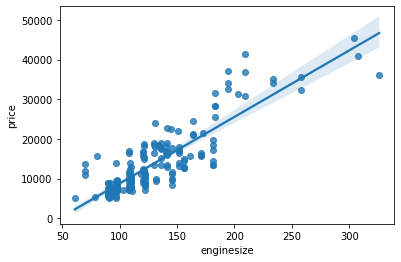

In [65]:
# usar os dados escalonados
# Plot data and a linear regression model fit.

sns.regplot(car.enginesize,car.price)

### Resíduos

In [66]:
car.price.dtype
y_fit

LinearRegression()

A soma dos resíduos é: 7.275957614183426e-12


C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='enginesize', ylabel='price'>

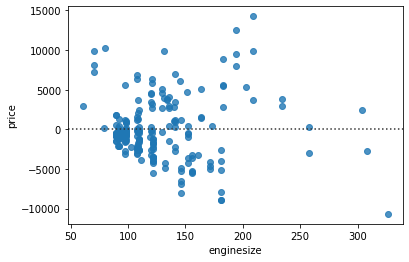

In [67]:
residuos = car.price-y_fit.predict(car.enginesize.array.reshape(-1, 1))
print('A soma dos resíduos é:',(residuos).sum())
sns.residplot(car.enginesize,car.price)

### Plotagem de resíduos

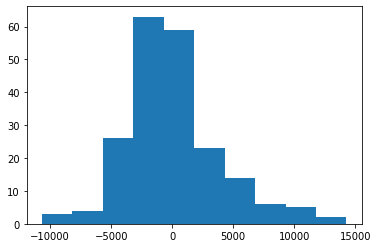

C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='enginesize', ylabel='price'>

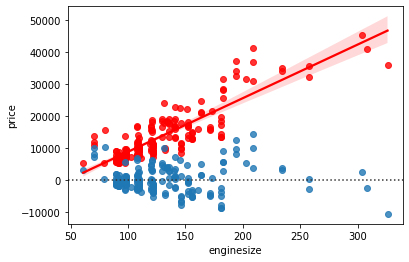

In [68]:
plt.hist(residuos)
plt.show()

sns.regplot(car.enginesize.array.reshape(-1,1),car.price,color='red',)
sns.residplot(car.enginesize,car.price)

# 9. Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

arvore = DecisionTreeClassifier(random_state = 42)

bgclf = BaggingClassifier(
            base_estimator=arvore, # Isso aqui não fez diferença porque esse algoritmo é o padrão
            n_estimators=100,
            max_samples=1.0, # % de samples
            max_features=1.0, # % de features
            bootstrap=True,
            bootstrap_features=False,
            oob_score=False,
            warm_start=False,
            n_jobs=None,
            random_state=12,
            verbose=0)
bgclf.fit(X_train,y_train)
bgclf.score(X_test,y_test)

0.762987012987013

## 9.1 Random Forest Classifier

In [70]:
rfclf = RandomForestClassifier(random_state=0)
rfclf.fit(X_train,y_train)
rfclf.score(X_test,y_test)

0.7792207792207793

# 10. Boosting

In [71]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(random_state=12)
adab.fit(X_train,y_train)
print('score Adaboost treino',adab.score(X_train,y_train))
print('score Adaboost teste',adab.score(X_test,y_test))

# Com GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
adabGNB = AdaBoostClassifier(base_estimator=GNB,random_state=12)
adabGNB.fit(X_train,y_train)
print('score Adaboost GNB treino',adabGNB.score(X_train,y_train))

score Adaboost treino 0.8586956521739131
score Adaboost teste 0.7467532467532467
score Adaboost GNB treino 0.6173913043478261


# 11. SVM - Support Vector Machine

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#um modelo qualquer
SVC_titanic = SVC(kernel = 'poly',
              degree = 3,
              random_state = 12)

SVC_titanic.fit(dfcX_train, dfcy_train)
#y_train_pred = SVC_titanic.predict(X_train)
print('Acurácia SCV sem GridSearch (train)', SVC_titanic.score(dfcX_train,dfcy_train)) #retorna a acurácia do SVM
print('Acurácia SCV sem GridSearch (teste)', SVC_titanic.score(dfcX_test,dfcy_test)) #retorna a acurácia do SVM

# com gridsearch
print('Com GridSearch:\n\n')
SVC_titanic2 = SVC(random_state=12, verbose=3)

#rodando o modelo sem o GridSearch
#SVC_titanic2.fit(X_train,y_train.values.ravel())
#print('Sem o GridSearch',SVC_titanic2.score(X_train,y_train.values.ravel()))

#define um gridsearch
Grid_S = GridSearchCV(SVC_titanic2, param_grid = {'kernel':['poly', 'rbf'], 
                                                  'C':[1, 0.5, 0.1],
                                                  'degree':[2,3,4], 
                                                  'gamma' : ['auto', 'scale'] })

#será que precisa disso aqui?
Modelo_titanic2 = Grid_S.fit(dfcX_train,dfcy_train.values.ravel())

print('\n\nGrid search - best score', Grid_S.best_score_)
print('Resultado de teste',Grid_S.score(dfcX_test,dfcy_test))
print('Resultado do treino',Modelo_titanic2.score(dfcX_train,dfcy_train.values.ravel()))

#será que não dá pra gerar os best params direto do Grid_S?
print('Melhores parâmetros:',Modelo_titanic2.best_params_)
# dá no mesmo: print('Melhores parâmetros:',Grid_S.best_params_)

Acurácia SCV sem GridSearch (train) 0.8170144462279294
Acurácia SCV sem GridSearch (teste) 0.8171641791044776
Com GridSearch:


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

Treinar de novo com os melhores parâmetros

In [73]:
SVC_titanic_best = SVC(random_state=12, verbose=3, C= 0.5, degree = 4, gamma = 'scale', kernel = 'poly')
SVC_titanic_best_fit = SVC_titanic_best.fit(dfcX_train,dfcy_train.values.ravel())
#y_test_best = SVC_titanic_best_fit.predict(dfcX_test)

print('\nTeste best fit:',SVC_titanic_best_fit.score(dfcX_test,dfcy_test))
print('Teste modelo GS:',Modelo_titanic2.score(dfcX_test,dfcy_test.values.ravel()))
print('Dá igual porque o GS treina de novo a base inteira com os melhores parâmetros')

print('\nreino best fit: ',SVC_titanic_best_fit.score(dfcX_train,dfcy_train))     
print('Treino modelo GS',Modelo_titanic2.score(dfcX_train,dfcy_train.values.ravel()))

print('\nModelo original teste:',SVC_titanic.score(dfcX_test,dfcy_test))
print('Modelo original treino:',SVC_titanic.score(dfcX_train,dfcy_train.values.ravel()))


[LibSVM]
Teste best fit: 0.8246268656716418
Teste modelo GS: 0.8246268656716418
Dá igual porque o GS treina de novo a base inteira com os melhores parâmetros

reino best fit:  0.8186195826645265
Treino modelo GS 0.8186195826645265

Modelo original teste: 0.8171641791044776
Modelo original treino: 0.8170144462279294


# Avaliação de modelos

## Matriz de Confusão

### Gerando os indicadores

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

confusao = confusion_matrix(y_test, neigh.predict(X_test_2))
tn, fp, fn, tp = confusao.ravel()
print('A acuracia é', round((tn+tp)/(tn+ fp+ fn+ tp),2))
#outra forma de fazer: 
metrics.accuracy_score(y_test, neigh.predict(X_test))
print('A sensibilidade positiva é', round((tp)/(fn+ tp),2))
print('O recall é', round((tn)/(tn+ fp),2))
print('A precisão é', round((tp)/(fp + tp),2))
print('O taxa de falsos positivos é', round((fp)/(tn+ fp),2))

A acuracia é 0.72
A sensibilidade positiva é 0.51
O recall é 0.84
A precisão é 0.62
O taxa de falsos positivos é 0.16


### Plotando a matriz de confusão

C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


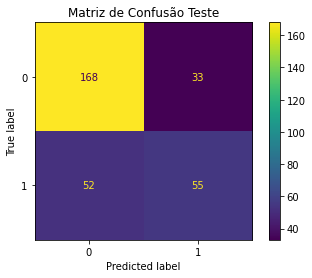

In [78]:
from sklearn import metrics
metrics.plot_confusion_matrix(neigh, X_test_2, y_test) 
plt.title('Matriz de Confusão Teste')
plt.show()

### Curva ROC

C:\Users\fabio\anaconda3\envs\rstudio\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


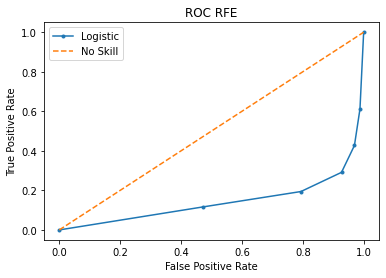

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(dfcX_train,dfcy_train)
dfcy_test_pred = KNN.predict_proba(dfcX_test) #tem o predict proba

# é aqui que se encontra o melhor threshold
fpr, tpr, thresholds = metrics.roc_curve(dfcy_test,dfcy_test_pred[:,0])

plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 
plt.ylabel('True Positive Rate')
plt.title('ROC RFE')
plt.xlabel('False Positive Rate')
plt. legend()
plt.show()

In [81]:
recall = round((tn)/(tn+ fp),2)
precision = round((tp)/(fp + tp),2)

F1 = 2* (precision * recall) / (precision + recall)
ix = np.argmax(F1)
print(f'Melhor Treshold-{thresholds [ix]}, com F1 score de {F1[ix]}')

IndexError: invalid index to scalar variable.

# Grid Search

In [82]:
from sklearn.model_selection import GridSearchCV

SVC_titanic2 = SVC(random_state=12, verbose=3)
#rodando o modelo sem o GridSearch
SVC_titanic2.fit(dfcX_train,dfcy_train.values.ravel())
print('Sem o GridSearch',SVC_titanic2.score(dfcX_train,dfcy_train.values.ravel()))

Grid_S = GridSearchCV(SVC_titanic2, param_grid = {'kernel':['poly', 'rbf'], 
                                                  'C':[1, 0.5, 0.1],
                                                  'degree':[2,3,4], 
                                                  'gamma' : ['auto', 'scale'] })
Modelo_titanic2 = Grid_S.fit(dfcX_train,dfcy_train.values.ravel())

[LibSVM]Sem o GridSearch 0.8057784911717496
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][Lib

In [83]:
print(Modelo_titanic2.score(dfcX_test,dfcy_test.values.ravel()))
print(Grid_S.score(dfcX_test,dfcy_test.values.ravel()))
print('train:',Modelo_titanic2.best_params_)
#usar esses parâmetros para treinar o modelo de novo

0.8246268656716418
0.8246268656716418
train: {'C': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


## K-fold Cross Validation

In [84]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
modelkf = LogisticRegression()

In [87]:
k = 5
X = dfcX_train   #.iloc[0:10,:]
y = dfcy_train.values.ravel()

In [88]:
# implementando um modelo basicão

modelkf.fit(dfcX_train, dfcy_train.values.ravel())
print('Treino:',modelkf.score(X, y))
print('Test:',modelkf.score(dfcX_test, dfcy_test.values.ravel()))

Treino: 0.7881219903691814
Test: 0.8171641791044776


In [89]:
kf = KFold(n_splits=k, random_state=None)
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    #print(test_index)
    
    modelkf.fit(X_train,y_train)
    pred_values = modelkf.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.752, 0.808, 0.824, 0.7983870967741935, 0.7741935483870968]
Avg accuracy : 0.7913161290322581


### Com RepeatedKFold

In [90]:
kf = RepeatedKFold(n_splits=k, n_repeats=1, random_state=None)
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    modelkf.fit(X_train,y_train)
    pred_values = modelkf.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    #print(acc)
    acc_score.append(acc)
 
print('accuracy of each fold:',(acc_score))
print('Avg accuracy:', np.array(acc_score).mean())

accuracy of each fold: [0.752, 0.8, 0.84, 0.7661290322580645, 0.7741935483870968]
Avg accuracy: 0.7864645161290322


### Usando cross_val_score()

In [91]:
#feito com o Titanic
result = cross_val_score(modelkf , X, y, cv = kf)

print('Resultados',result)
print("Avg accuracy: {}".format(result.mean()))

Resultados [0.736      0.752      0.776      0.83064516 0.85483871]
Avg accuracy: 0.7898967741935484


### K-Fold na raça

https://medium.com/data-hackers/como-criar-k-fold-cross-validation-na-m%C3%A3o-em-python-c0bb06074b6b

In [101]:
#X.iloc[:,:-1]
#X.iloc[:,-1] # vira uma série

#from random import sample
print('A lista vai de 0 a',len(X)-1)
#amostra = sample(list(range(0,len(X))),3) 
#indices = list(range(0,10)) # <<<--- AQUI É PARA MEXER
indices = list(range(0,len(X))) # <<<--- AQUI É PARA MEXER
k = 5 # <<<--- AQUI É PARA MEXER

#print('Indices:',indices)
print('k:',k)

# O próximo passo é determinar o tamanho de cada subset da nossa lista de índices.
# No nosso caso, como temos uma lista com 10 elementos e k = 2, cada subset terá 5 elementos. 
# Uma forma de escrever isso em Python é:

subset_size = round(len(indices) / k)

# Vamos criar uma nova lista, em que cada elemento dela será um dos subsets da lista indices. 
# Daremos à essa nova lista o nome sugestivo de subsets

subsets = [indices[x:x+subset_size] for x in range(0, len(indices), subset_size)]
pd.DataFrame(subsets)

# Agora que temos os 2 subsets salvos na lista subsets, podemos usá-los para criar 2 folds 
# com os conjuntos de treino e teste para serem usados na avaliação do nosso modelo:

kfolds = []
for i in range(k):
    test = subsets[i]
    train = []
    for subset in subsets:
        if subset != test:
            train.append(subset)
    kfolds.append((train, test))

A lista vai de 0 a 622
k: 5


In [102]:
kfolds

[([[125,
    126,
    127,
    128,
    129,
    130,
    131,
    132,
    133,
    134,
    135,
    136,
    137,
    138,
    139,
    140,
    141,
    142,
    143,
    144,
    145,
    146,
    147,
    148,
    149,
    150,
    151,
    152,
    153,
    154,
    155,
    156,
    157,
    158,
    159,
    160,
    161,
    162,
    163,
    164,
    165,
    166,
    167,
    168,
    169,
    170,
    171,
    172,
    173,
    174,
    175,
    176,
    177,
    178,
    179,
    180,
    181,
    182,
    183,
    184,
    185,
    186,
    187,
    188,
    189,
    190,
    191,
    192,
    193,
    194,
    195,
    196,
    197,
    198,
    199,
    200,
    201,
    202,
    203,
    204,
    205,
    206,
    207,
    208,
    209,
    210,
    211,
    212,
    213,
    214,
    215,
    216,
    217,
    218,
    219,
    220,
    221,
    222,
    223,
    224,
    225,
    226,
    227,
    228,
    229,
    230,
    231,
    232,
    233,
    234,
    235,
 

In [103]:
'''
A lista kfolds possui todos os índices dos conjuntos de treino e teste agrupados em tuplas. 
Cada tupla, ou fold, possui um conjunto de treino (primeiro elemento da tupla) 
e um conjunto de teste (segundo elemento da tupla). 
Logo, basta iterarmos sobre a lista kfold e em cada iteração, 
treinarmos o nosso modelo no primeiro elemento da tupla e testarmos no segundo elemento da tupla.
'''
    
def kfoldcv(indices, k):
    
    size = len(indices)
    subset_size = round(size / k)
    
    subsets = [indices[x:x+subset_size] for x in range(0, len(indices), subset_size)]
    kfolds = []
    for i in range(k):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train,test))
        
    return kfolds

In [104]:
'''
É importante não selecionar as amostras em ordem, então vamos usar a função random
'''

import random
def kfoldcv_random(indices, kn = 10,seed = 42):
    
    
    size = len(indices)
    subset_size = round(size / kn)
    random.Random(seed).shuffle(indices)
    subsets = [indices[x:x+subset_size] for x in range(0, len(indices), subset_size)]
    print(subsets)
    kfolds = []
    for i in range(kn):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train,test))
    return kfolds


In [96]:
# Mostrando diferenças nos arrays gerados pelas funções acima
# print(np.array(kfoldcv(indices,k=5),dtype=object))
# print(np.array(kfoldcv_random(indices,k=5),dtype=object))

In [105]:
# "Congelando" um array de índices
kfoldcv_random = kfoldcv_random(indices, kn = 5)

[[230, 168, 335, 441, 321, 240, 76, 62, 466, 329, 538, 12, 586, 261, 148, 622, 383, 75, 454, 297, 575, 484, 179, 502, 566, 529, 309, 132, 446, 361, 570, 568, 219, 100, 406, 131, 294, 207, 340, 298, 8, 571, 319, 211, 268, 452, 209, 439, 164, 455, 14, 487, 255, 608, 177, 107, 138, 582, 443, 147, 380, 556, 251, 350, 140, 235, 460, 325, 600, 314, 506, 402, 18, 471, 213, 119, 418, 308, 42, 382, 96, 198, 21, 186, 498, 265, 106, 254, 193, 483, 116, 83, 77, 74, 360, 192, 510, 581, 288, 403, 285, 339, 599, 561, 22, 302, 86, 304, 118, 573, 24, 395, 355, 420, 518, 514, 456, 245, 537, 187, 567, 499, 411, 92, 15], [237, 128, 351, 475, 188, 603, 496, 345, 227, 419, 618, 437, 376, 358, 493, 155, 144, 415, 88, 318, 195, 172, 492, 372, 66, 305, 341, 286, 137, 279, 130, 552, 421, 17, 354, 331, 423, 375, 182, 457, 503, 200, 614, 397, 275, 56, 474, 477, 476, 485, 447, 258, 422, 171, 247, 347, 184, 597, 105, 45, 221, 60, 530, 158, 287, 215, 90, 26, 170, 63, 495, 336, 481, 201, 584, 534, 527, 542, 110, 356,

In [106]:
kfoldcv_random

[([[237,
    128,
    351,
    475,
    188,
    603,
    496,
    345,
    227,
    419,
    618,
    437,
    376,
    358,
    493,
    155,
    144,
    415,
    88,
    318,
    195,
    172,
    492,
    372,
    66,
    305,
    341,
    286,
    137,
    279,
    130,
    552,
    421,
    17,
    354,
    331,
    423,
    375,
    182,
    457,
    503,
    200,
    614,
    397,
    275,
    56,
    474,
    477,
    476,
    485,
    447,
    258,
    422,
    171,
    247,
    347,
    184,
    597,
    105,
    45,
    221,
    60,
    530,
    158,
    287,
    215,
    90,
    26,
    170,
    63,
    495,
    336,
    481,
    201,
    584,
    534,
    527,
    542,
    110,
    356,
    560,
    149,
    588,
    458,
    139,
    522,
    176,
    19,
    28,
    2,
    143,
    557,
    180,
    253,
    113,
    266,
    293,
    241,
    606,
    33,
    197,
    338,
    462,
    11,
    70,
    212,
    428,
    435,
    23,
    13,
    324,
    326,
    414,
 

In [ ]:
# "Achatador" de listas
def flatten_list(nested_list):
    single_list = []
    for item in nested_list:
        single_list.extend(item)
    return single_list



In [107]:
from collections import Iterable
def flatten(xs):
    for x in xs:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x

# modelkff = LogisticRegression()
range_ = k
score_list = []

for j in range(range_):
    #for i in range(range_):
    X_slice_train = X.iloc[list(flatten(kfoldcv_random[j][0]))]
    y_slice_train = y[list(flatten(kfoldcv_random[j][0]))]
      
    X_slice_test = X.iloc[list(flatten(kfoldcv_random[j][1]))]
    y_slice_test = y[list(flatten(kfoldcv_random[j][1]))]
        
    modelkf.fit(X_slice_train,y_slice_train)
        
    score_ = modelkf.score(X_slice_test,y_slice_test)
    score_list.append(score_)
    print(round(score_,3))
    
    #print('Média:',round(np.asarray(score_list).mean(),3))

print('Média global:',round(np.asarray(score_list).mean(),3))

0.792
0.808
0.768
0.792
0.789
Média global: 0.79


# AQUI PARECE ESTAR CERTO
mas não está... é mais simples que isso

In [ ]:
# modelkff = LogisticRegression()
range_ = k-1
score_list = []

for j in range(range_):
    for i in range(range_):
        X_slice_train = X.iloc[kfoldcv_random[j][0][i]]
        y_slice_train = y[kfoldcv_random[j][0][i]]
        
        X_slice_test = X.iloc[kfoldcv_random[j][1]]
        y_slice_test = y[kfoldcv_random[j][1]]
        
        modelkf.fit(X_slice_train,y_slice_train)
        
        score_ = modelkf.score(X_slice_test,y_slice_test)
        score_list.append(score_)
        #print(i,j)
        print(round(score_,3))
    
    print('Média:',round(np.asarray(score_list[j*4:j*4+4]).mean(),3))

print('Média global:',round(np.asarray(score_list).mean(),3))

In [ ]:
#testando umas consultas de array
print(np.array(kfolds,dtype=object))
kfolds[1][1]
kfolds[2:] # da lista 2 até o final
kfolds[:2] # até o item 2 (não incluído)
print(kfolds[0][0][3]) # retorna a sublista zero da sublista 0
# np.asarray(kfolds[0][0]).ravel() # tá, mas não é isso que é pra fazer
print(kfolds[0][1])

### K-fold - Exemplo do SKLearn

K-fold - exemplo do sklearn

import numpy as np
from sklearn.model_selection import RepeatedKFold, KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
#kf = KFold(n_splits=4)
for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    #print(X_train)
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
from sklearn.metrics import mean_squared_error
metrics.mean_squared_error(y_arr, 0.3*x_arr)